# PETI8123 Lab 5: Clustering

This lab aims to introduce the methods to perform clustering analysis with Python.

## 1. Import Modules

In [1]:
# Import pandas library for data manipulation
import pandas as pd

# Import NumPy library for numerical operations
import numpy as np

# Import Seaborn library for data visualization
import seaborn as sns

# Import Matplotlib's pyplot module for creating plots
import matplotlib.pyplot as plt

# Import the warnings module to suppress warnings
import warnings

# Enable inline plotting within Jupyter Notebook
%matplotlib inline

# Suppress warning messages
warnings.filterwarnings('ignore')

# Set Pandas to display a maximum of 99 columns in DataFrame output
pd.options.display.max_columns = 99

## 2. Loading and Checking the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the data from the CSV file into a DataFrame
path = '/content/drive/MyDrive/Innovations in Technology and Education/'
df = pd.read_csv(path + "lab5_data.csv")

# Display the first 5 rows of the DataFrame to inspect the data
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [4]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
# Check for null values
df.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

## 3. Exploratory Data Analysis

In [6]:
# Check the unique values in the 'class' column
unique_classes = df['class'].unique()
print(unique_classes)

[ 2  7 10  1  6 11 13  3  4  5  8  9 12]


<Axes: xlabel='class', ylabel='count'>

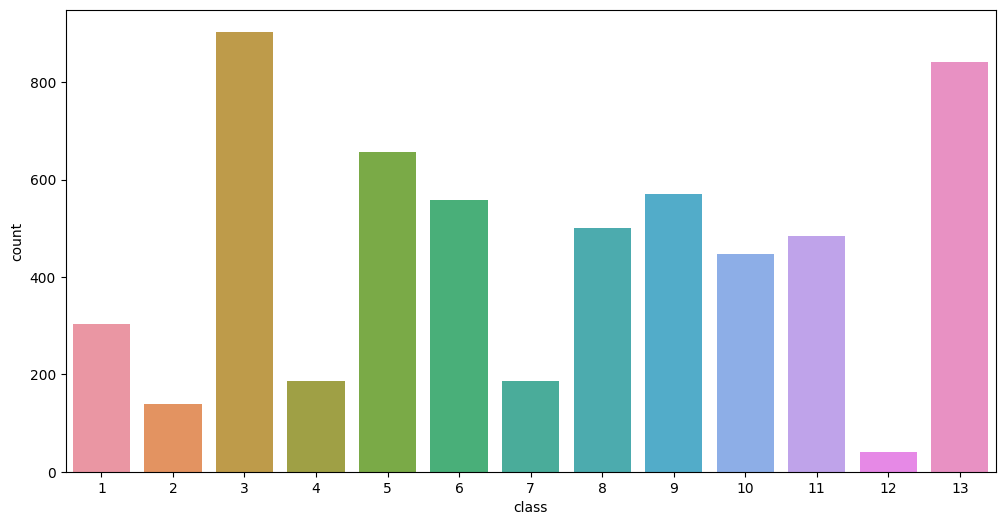

In [8]:
# Create a figure with a specified size (12x6 inches)
plt.figure(figsize=(12, 6))

# countplot 計數量
# Create a count plot to visualize the distribution of 'class' column
sns.countplot(x='class', data=df)

In [10]:
# Extract the columns containing questions (assuming they are columns 5 to 32)
x_questions = df.iloc[:, 5:33]

# Calculate the mean of each question across all rows (axis=0)
q_mean = x_questions.mean(axis=0)
print(f'q_mean: {q_mean}')

# Calculate the total mean of all question means
total_mean = q_mean.mean()
print(f'total_mean: {total_mean}')

q_mean: Q1     2.929897
Q2     3.073883
Q3     3.178694
Q4     3.082474
Q5     3.105842
Q6     3.107388
Q7     3.066323
Q8     3.041924
Q9     3.165979
Q10    3.090722
Q11    3.183849
Q12    3.035567
Q13    3.242784
Q14    3.290893
Q15    3.287285
Q16    3.169588
Q17    3.398454
Q18    3.222509
Q19    3.261684
Q20    3.285395
Q21    3.307388
Q22    3.317526
Q23    3.201890
Q24    3.166838
Q25    3.312543
Q26    3.222165
Q27    3.154811
Q28    3.308076
dtype: float64
total_mean: 3.1861561119293076


In [11]:
# Convert the 'q_mean' Series to a DataFrame with a 'mean' column
q_mean = q_mean.to_frame('mean')

# Reset the index of the DataFrame
q_mean.reset_index(level=0, inplace=True)

# Display the first 5 rows of the DataFrame
q_mean.head()

,index,mean
0,Q1,2.929897
1,Q2,3.073883
2,Q3,3.178694
3,Q4,3.082474
4,Q5,3.105842


<Axes: xlabel='index', ylabel='mean'>

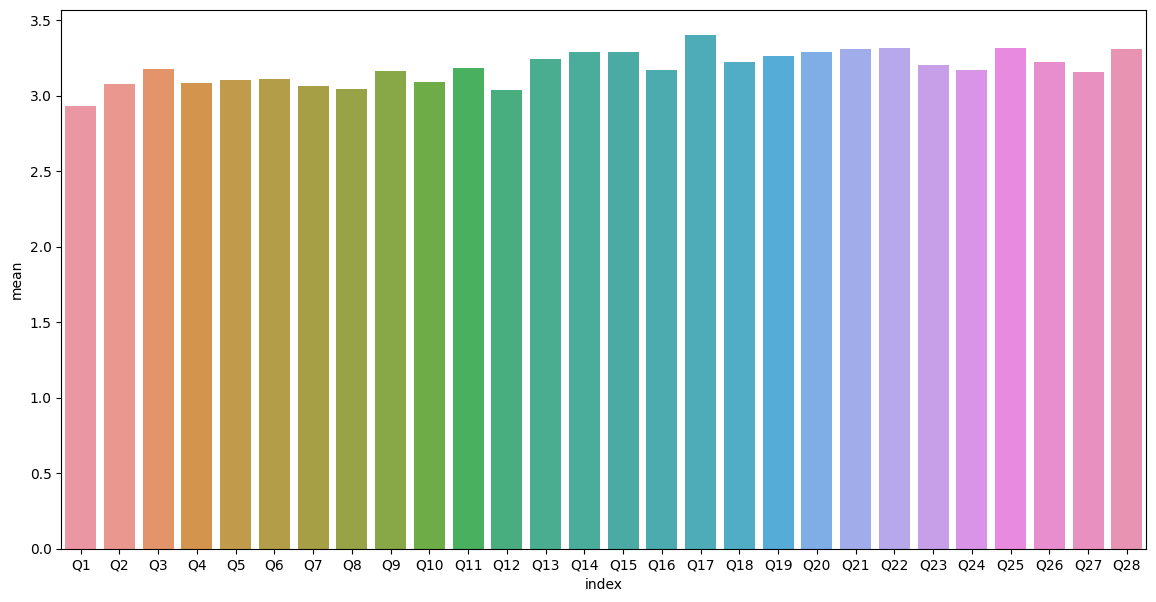

In [12]:
# Create a figure with a specified size (14x7 inches)
plt.figure(figsize=(14, 7))

# Create a bar plot to visualize the mean values of questions
sns.barplot(x='index', y='mean', data=q_mean)

## 4. Corelation Matrix

In [13]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Calculate the correlation matrix for your DataFrame 'df'
corr = df.corr()

In [18]:
corr

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
instr,1.000000,-0.039871,0.112763,-0.107231,-0.058368,-0.128931,-0.127070,-0.108949,-0.113222,-0.135606,-0.098319,-0.124434,-0.150109,-0.111789,-0.130046,-0.129535,-0.127036,-0.111460,-0.102328,-0.099802,-0.127069,-0.080583,-0.148547,-0.112485,-0.086831,-0.078101,-0.080586,-0.118889,-0.128880,-0.083563,-0.103499,-0.107664,-0.081672
class,-0.039871,1.000000,0.091527,-0.016312,-0.044899,-0.029542,-0.033274,-0.021534,-0.030165,-0.036584,-0.045972,-0.046761,-0.039296,-0.018430,-0.033938,-0.021136,-0.044862,-0.046971,-0.043900,-0.039041,-0.036635,-0.028957,-0.021874,-0.018727,-0.031234,-0.022758,-0.016553,-0.025983,-0.036712,-0.027816,-0.029491,-0.022576,-0.037364
nb.repeat,0.112763,0.091527,1.000000,-0.078086,0.110493,-0.024708,-0.041707,-0.035704,-0.033613,-0.031770,-0.026918,-0.030950,-0.024204,-0.037347,-0.028612,-0.033658,-0.015900,-0.043793,-0.051543,-0.039659,-0.025640,-0.049526,-0.037392,-0.045568,-0.042624,-0.046262,-0.045464,-0.041233,-0.033618,-0.049918,-0.035518,-0.032457,-0.044900
attendance,-0.107231,-0.016312,-0.078086,1.000000,0.436792,0.105266,0.149258,0.178393,0.138108,0.149747,0.143705,0.137472,0.132821,0.182293,0.146931,0.178899,0.129572,0.186478,0.202252,0.195845,0.153071,0.231480,0.179173,0.190694,0.195166,0.204802,0.207740,0.177814,0.163546,0.204435,0.172695,0.144687,0.200150
difficulty,-0.058368,-0.044899,0.110493,0.436792,1.000000,0.052120,0.065031,0.071457,0.062171,0.064181,0.052746,0.050054,0.051695,0.055029,0.042884,0.058969,0.036372,0.079498,0.092500,0.089459,0.049718,0.122520,0.068520,0.080017,0.091051,0.095628,0.099543,0.075317,0.072609,0.099682,0.064456,0.059370,0.090876
Q1,-0.128931,-0.029542,-0.024708,0.105266,0.052120,1.000000,0.866138,0.767381,0.849773,0.804757,0.769561,0.793957,0.793347,0.734744,0.796612,0.716076,0.761197,0.717862,0.695822,0.696410,0.736938,0.612202,0.705682,0.699370,0.685299,0.673770,0.670702,0.728770,0.732167,0.672120,0.698924,0.709639,0.658873
Q2,-0.127070,-0.033274,-0.041707,0.149258,0.065031,0.866138,1.000000,0.850766,0.873556,0.861803,0.832950,0.838941,0.829355,0.802686,0.853124,0.787323,0.802881,0.796802,0.785397,0.787080,0.812328,0.716971,0.785076,0.788643,0.778299,0.764986,0.766872,0.801172,0.797314,0.766622,0.778405,0.768125,0.752515
Q3,-0.108949,-0.021534,-0.035704,0.178393,0.071457,0.767381,0.850766,1.000000,0.826342,0.843329,0.823871,0.817332,0.805502,0.797559,0.830147,0.808794,0.776802,0.806412,0.810004,0.804758,0.792792,0.772291,0.796057,0.799645,0.795384,0.791391,0.789747,0.799752,0.792241,0.793341,0.796296,0.765633,0.781299
Q4,-0.113222,-0.030165,-0.033613,0.138108,0.062171,0.849773,0.873556,0.826342,1.000000,0.867861,0.836157,0.839964,0.823411,0.779555,0.835356,0.770253,0.793274,0.778253,0.774977,0.779543,0.791090,0.704364,0.769367,0.769526,0.759810,0.752171,0.748081,0.788852,0.789508,0.752370,0.766368,0.759536,0.742186
Q5,-0.135606,-0.036584,-0.031770,0.149747,0.064181,0.804757,0.861803,0.843329,0.867861,1.000000,0.882874,0.889338,0.875521,0.812241,0.883126,0.805989,0.816730,0.825557,0.814062,0.809222,0.842537,0.725451,0.815126,0.809381,0.794833,0.780245,0.778777,0.831221,0.830279,0.782437,0.804916,0.791877,0.767411


<Axes: >

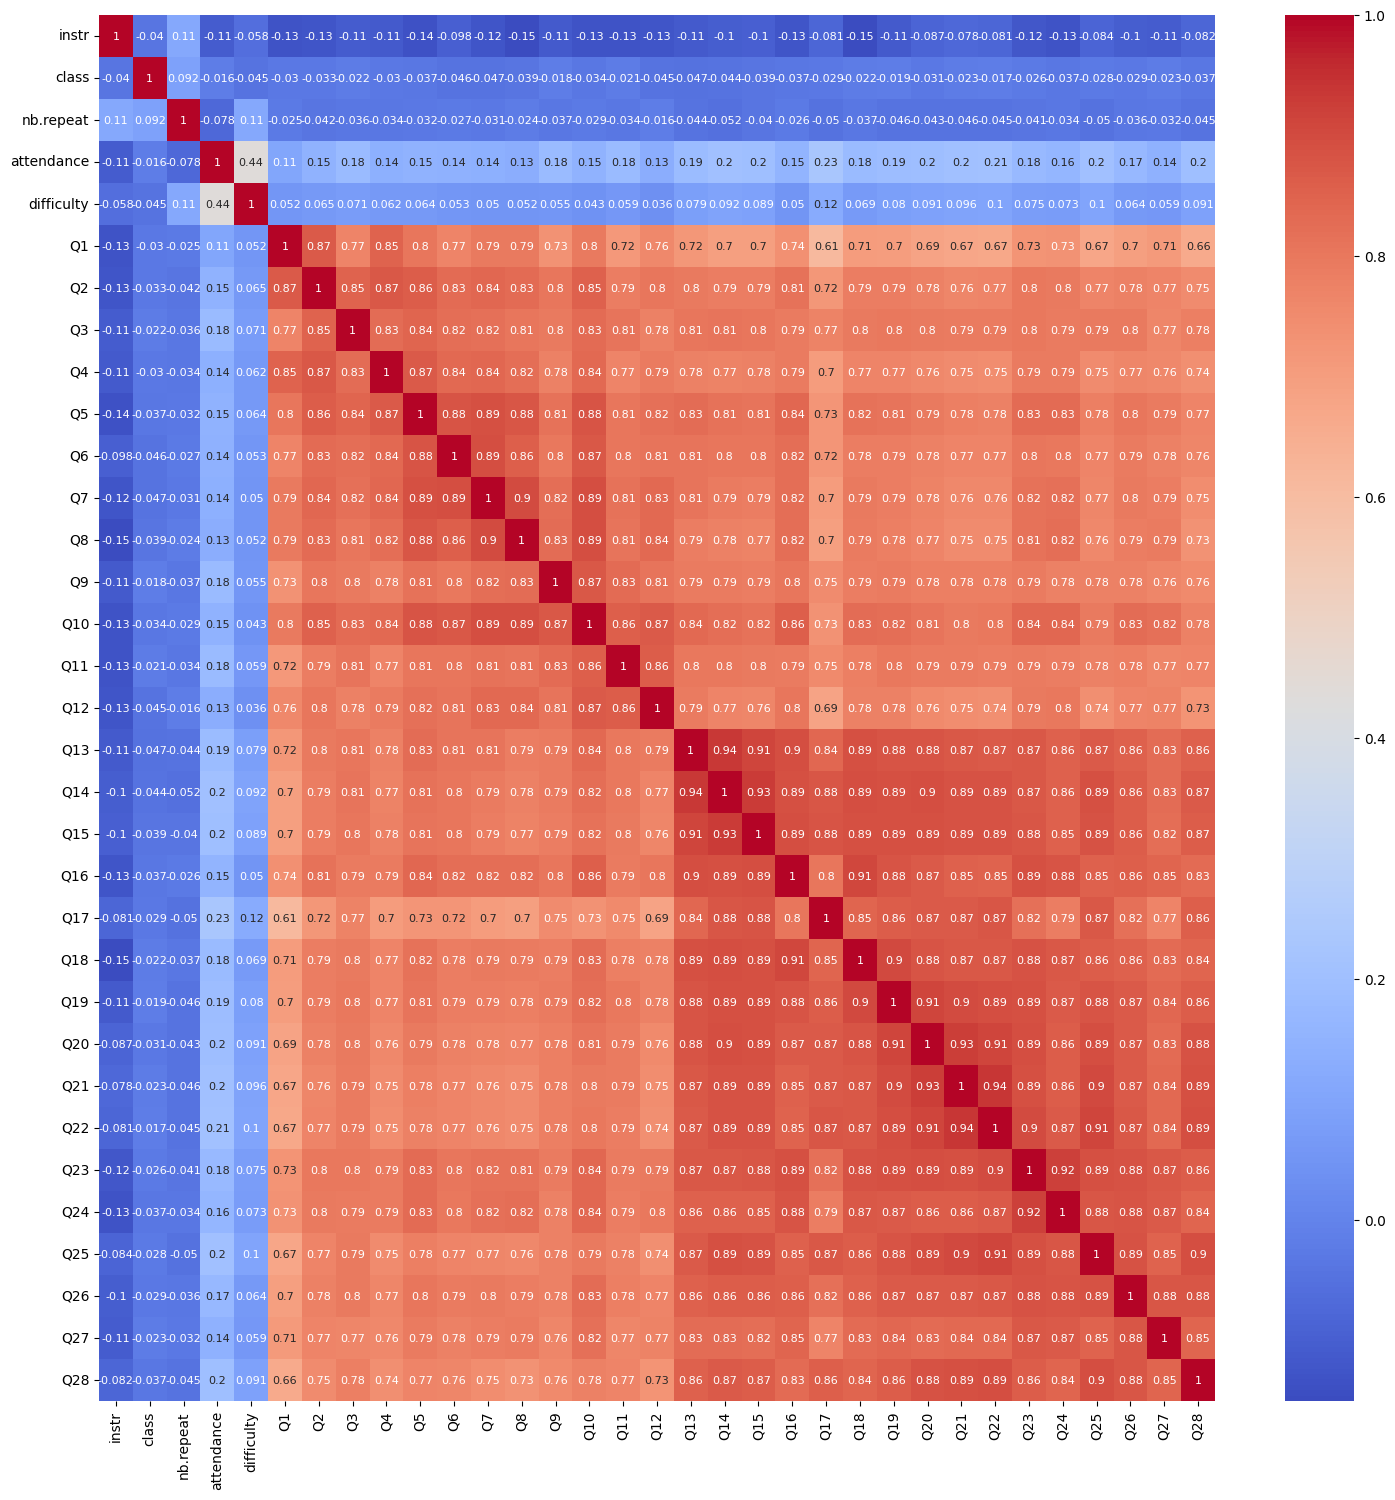

In [19]:
# Create a figure with a specified size (18x18 inches)
plt.figure(figsize=(18, 18))

# Create a heatmap to visualize the correlation matrix
# Use the 'coolwarm' colormap and display the correlation values with annotations
# Set the size of the annotation text to 8 points
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 8})

## 5. Clustering

First, we need to use Principal Component Analysis (PCA) to reduce the dimensions of data.

In [20]:
# PCA used to reduce the large num of features

In [22]:
# Import PCA (Principal Component Analysis) from scikit-learn
from sklearn.decomposition import PCA

In [23]:
# Extract a subset of the DataFrame containing columns from index 5 to 32
X = df.iloc[:, 5:33]

In [24]:
# Create a PCA model with 2 components and a specified random seed
pca = PCA(n_components=2, random_state=42)

# Fit the PCA model to the data 'X' and transform the data into the reduced 2D space
X_pca = pca.fit_transform(X)

In [25]:
X_pca

array([[ 0.98901533,  0.52279815],
       [ 0.98901533,  0.52279815],
       [-9.59128851,  0.6408021 ],
       ...,
       [-9.59128851,  0.6408021 ],
       [11.56931918,  0.40479421],
       [11.56931918,  0.40479421]])

### 5.1. K-Means Clustering

Below is the code for running K-Means Clustering. If you want to learn more about this algorithm, please visit this link: https://en.wikipedia.org/wiki/K-means_clustering

In [26]:
# Import KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

In [32]:
# Create an empty list to store distortion values for different cluster sizes
distortions = []

# Define the range of cluster sizes for the elbow method (1 to 5 clusters)
cluster_range = range(1, 8)

In [33]:
### Elbow method ###
# Elbow method: Loop through different cluster sizes and calculate distortions
for i in cluster_range:
  # Create a KMeans model with the specified number of clusters, 'k-means++' initialization, and a random seed
  model = KMeans(n_clusters=i, init='k-means++', random_state=42)

  # Fit the KMeans model to the data in 'X_pca'
  model.fit(X_pca)

  # Append the distortion (inertia) to the list
  distortions.append(model.inertia_)

In [34]:
print(f'distortions: {distortions}')

distortions: [230632.87797073938, 89453.54125300725, 38761.904560474206, 25178.912263909355, 17028.839077819113, 12589.118933341571, 10346.350551823944]


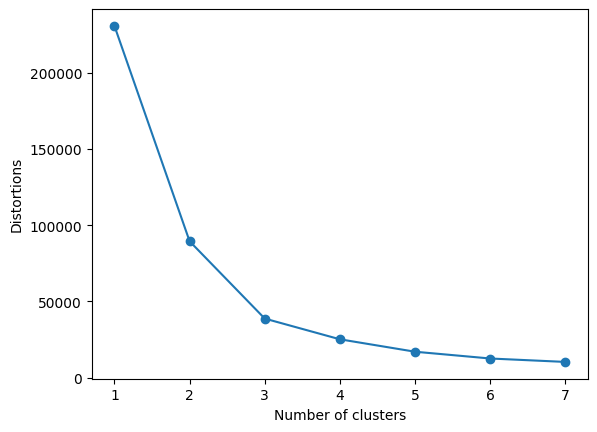

In [35]:
# Plot Elbow
# Create a line plot to visualize the distortions for different cluster sizes
plt.plot(cluster_range, distortions, marker='o')

# Label the x-axis
plt.xlabel("Number of clusters")

# Label the y-axis
plt.ylabel('Distortions')

# Display the plot
plt.show()


In [36]:
# Create a KMeans model with the specified number of clusters (3), 'k-means++' initialization, and a random seed
model = KMeans(n_clusters=3, init='k-means++', random_state=42)

# Fit the KMeans model to the data in 'X_pca'
model.fit(X_pca)

# Predict cluster labels for the data points in 'X_pca'
y = model.predict(X_pca)

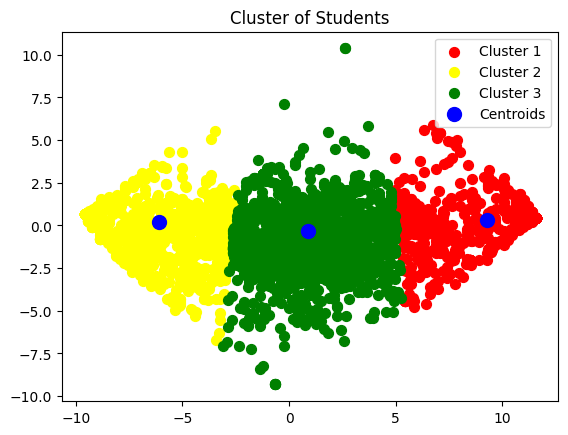

In [37]:
# Create scatter plots for each cluster
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], s=50, c='green', label='Cluster 3')

# Plot the cluster centroids as blue points
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='blue', label='Centroids')

# Set the title of the plot
plt.title('Cluster of Students')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

### 5.2. Cluster Analysis

In [38]:
# Assuming you have already performed clustering and have labels in 'y'
# Also, assuming you have your original data in 'X' (before PCA)

# Calculate the mean of each cluster and store them in a list
cluster_means = []
cluster_data = []

for i in range(3): # Assuming you have 3 clusters
  cluster_mask = (y == i)
  cluster_data_points = X[cluster_mask] # Get the original data points for this cluster
  cluster_mean = np.mean(cluster_data_points, axis=0) # Calculate the mean of original data
  cluster_means.append(cluster_mean)
  cluster_data.append(cluster_data_points)

  # Print the mean of each cluster
  print(f"Cluster {i + 1} Mean:")
  print(cluster_mean)
  print(f"Data points in Cluster {i + 1}:", len(cluster_data_points), end="\n\n")

# To access the data points for a specific cluster (for example, cluster 1):
# cluster_1_data = cluster_data[0]

# To access the mean for a specific cluster (for example, cluster 1):
# cluster_1_mean = cluster_means[0]


Cluster 1 Mean:
Q1     1.395968
Q2     1.404032
Q3     1.509677
Q4     1.436290
Q5     1.391129
Q6     1.410484
Q7     1.396774
Q8     1.379839
Q9     1.503226
Q10    1.369355
Q11    1.467742
Q12    1.381452
Q13    1.420161
Q14    1.449194
Q15    1.467742
Q16    1.358065
Q17    1.622581
Q18    1.400806
Q19    1.431452
Q20    1.425000
Q21    1.465323
Q22    1.483065
Q23    1.393548
Q24    1.387097
Q25    1.497581
Q26    1.431452
Q27    1.408065
Q28    1.493548
dtype: float64
Data points in Cluster 1: 1240

Cluster 2 Mean:
Q1     4.101260
Q2     4.262376
Q3     4.295230
Q4     4.247975
Q5     4.313681
Q6     4.276328
Q7     4.265077
Q8     4.238974
Q9     4.304680
Q10    4.320882
Q11    4.334833
Q12    4.224122
Q13    4.393339
Q14    4.414491
Q15    4.406841
Q16    4.377138
Q17    4.417642
Q18    4.389289
Q19    4.409541
Q20    4.418992
Q21    4.424392
Q22    4.436544
Q23    4.391089
Q24    4.358686
Q25    4.419442
Q26    4.377588
Q27    4.311881
Q28    4.410441
dtype: float64
Data point

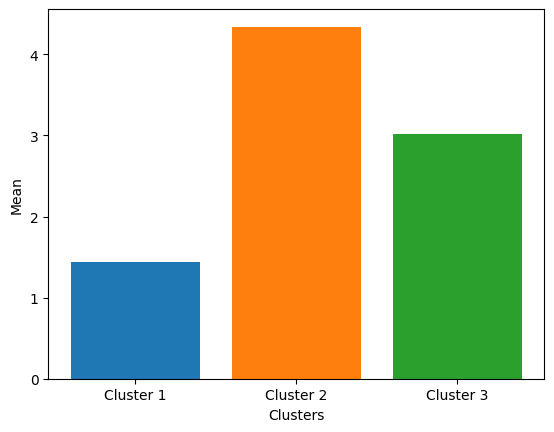

In [39]:
# Create a bar plot to show the cluster means
for i in range(3):
    plt.bar(f'Cluster {i + 1}', np.mean(cluster_means[i]), label=f'Cluster {i + 1}')

# Label the x-axis
plt.xlabel('Clusters')

# Label the y-axis
plt.ylabel('Mean')

# Display the plot
plt.show()

## ⚠️ Exercise

Try to run K-Means Clustering with ``k = 4`` and plot the means of the clusters. Observe the difference with such value of ``k``.

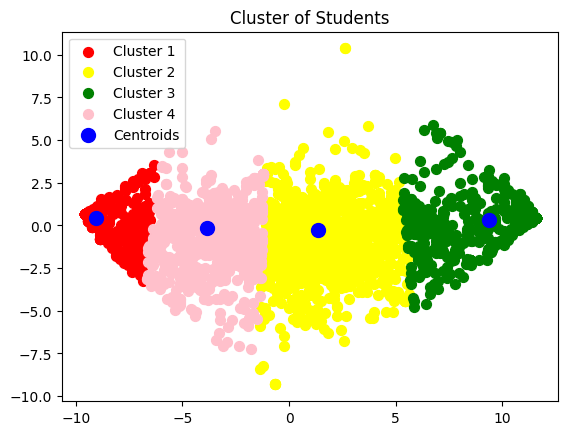

In [45]:
### K-Means Clustering ###

# Import PCA (Principal Component Analysis) from scikit-learn
from sklearn.decomposition import PCA

# Import KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

# Extract a subset of the DataFrame containing columns from index 5 to 32
X = df.iloc[:, 5:33]

# Create a PCA model with 2 components and a specified random seed
pca = PCA(n_components=2, random_state=42)

# Fit the PCA model to the data 'X' and transform the data into the reduced 2D space
X_pca = pca.fit_transform(X)

# Create a KMeans model with the specified number of clusters (3), 'k-means++' initialization, and a random seed
model = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Fit the KMeans model to the data in 'X_pca'
model.fit(X_pca)

# Predict cluster labels for the data points in 'X_pca'
y = model.predict(X_pca)

# Create scatter plots for each cluster
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X_pca[y == 3, 0], X_pca[y == 3, 1], s=50, c='pink', label='Cluster 4')

# Plot the cluster centroids as blue points
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='blue', label='Centroids')

# Set the title of the plot
plt.title('Cluster of Students')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

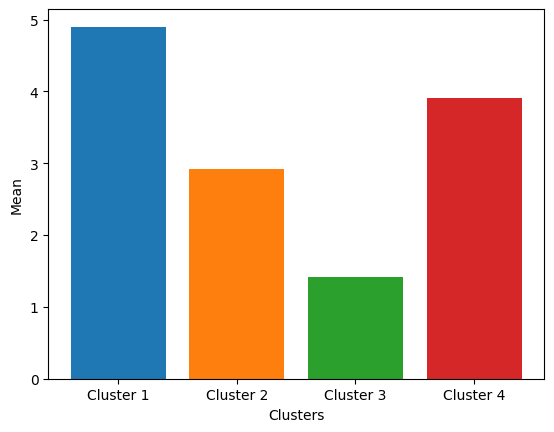

In [47]:
### Plot the means ###

# Assuming you have already performed clustering and have labels in 'y'
# Also, assuming you have your original data in 'X' (before PCA)

# Calculate the mean of each cluster and store them in a list
cluster_means = []
cluster_data = []

for i in range(4): # Assuming you have 4 clusters
  cluster_mask = (y == i)
  cluster_data_points = X[cluster_mask] # Get the original data points for this cluster
  cluster_mean = np.mean(cluster_data_points, axis=0) # Calculate the mean of original data
  cluster_means.append(cluster_mean)
  cluster_data.append(cluster_data_points)

  # Print the mean of each cluster
  # print(f"Cluster {i + 1} Mean:")
  # print(cluster_mean)
  # print(f"Data points in Cluster {i + 1}:", len(cluster_data_points), end="\n\n")

# To access the data points for a specific cluster (for example, cluster 1):
# cluster_1_data = cluster_data[0]

# To access the mean for a specific cluster (for example, cluster 1):
# cluster_1_mean = cluster_means[0]

# Create a bar plot to show the cluster means
for i in range(4):
    plt.bar(f'Cluster {i + 1}', np.mean(cluster_means[i]), label=f'Cluster {i + 1}')

# Label the x-axis
plt.xlabel('Clusters')

# Label the y-axis
plt.ylabel('Mean')

# Display the plot
plt.show()